In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import os
from urllib.request import urlretrieve
import pandas as pd
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename = 'Fremont.csv', url=URL, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
    data = pd.read_csv(filename,index_col='Date',parse_dates = True)
    data.columns = ['Total','West','East']
    return data

In [2]:
data = get_fremont_data()
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


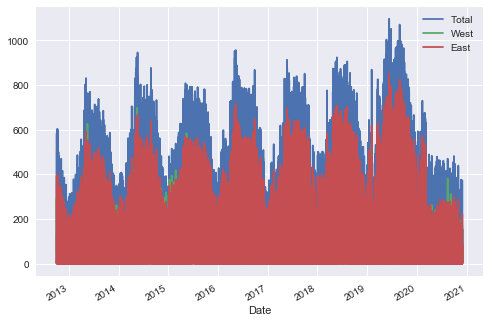

In [3]:
# visualisation

# put all the plots in the notebook itself, rather than separate windows
data.plot()

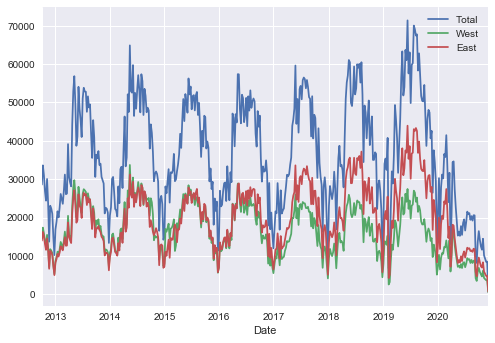

In [4]:
data.resample('W').sum().plot()

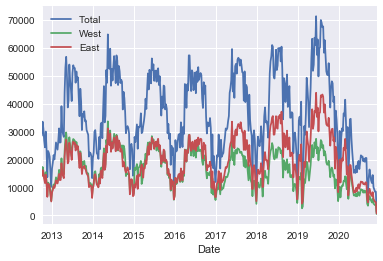

In [5]:
%matplotlib inline
data.resample('W').sum().plot()

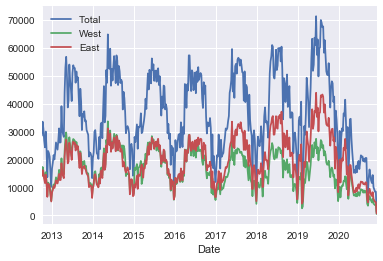

In [6]:



data.resample('W').sum().plot()

In [7]:
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


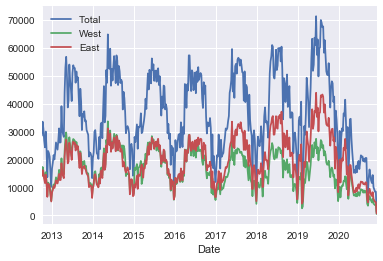

In [8]:
data.resample('W').sum().plot()

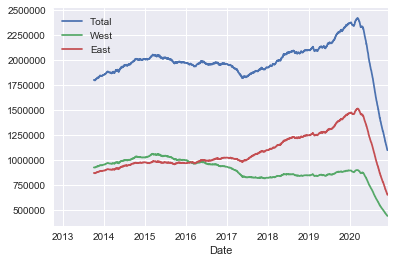

In [9]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 2519182.9)

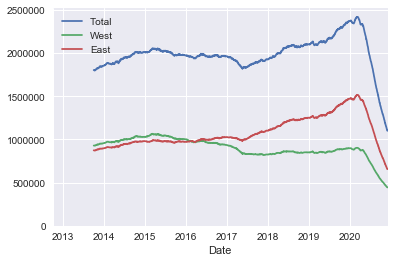

In [10]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None) # setting bottom line of y to be y = 0

(0, 2519182.9)

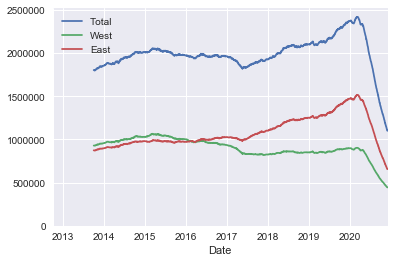

In [11]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None) # setting bottom line of y to be y = 0

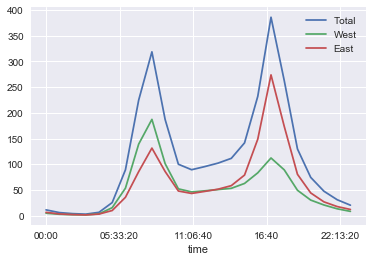

In [12]:
# look at trends at individual days
data.groupby(data.index.time).mean().plot()

In [13]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


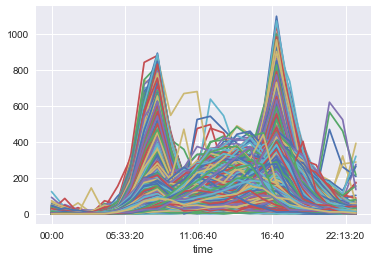

In [14]:
pivoted.plot(legend=False)

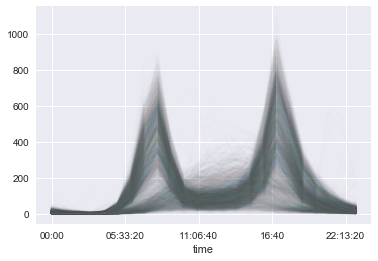

In [15]:
pivoted.plot(legend=False, alpha=0.01) # add transparency to better visualise